# Radial Basis Function

WIP ! Radial basis functions are a way of approximating multivariable  functions using linear combinations of single univariate function.

## Kernel Functions

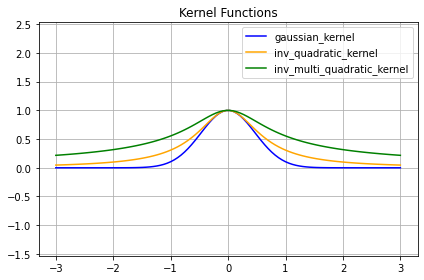

In [1]:
import numpy as np
import matplotlib.pyplot as plt
KERNEL_PARAMETER = 1.5
def gaussian_kernel(r):
    return np.exp(-np.square((r * KERNEL_PARAMETER)))

def inverse_quadratic_kernel(r):
    return 1.0 / (1.0 + np.square(r * KERNEL_PARAMETER))

def inverse_multi_quadratic_kernel(r):
    return 1.0 / np.sqrt(1.0 + np.square(r * KERNEL_PARAMETER))

def draw_kernel():
    funcs = [gaussian_kernel, inverse_quadratic_kernel, inverse_multi_quadratic_kernel]
    names = ['gaussian_kernel', 'inv_quadratic_kernel', 'inv_multi_quadratic_kernel']
    colors = ['blue', 'orange', 'green']
    t = np.linspace(-3, 3, num=100, endpoint=True)
    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')
    ax.grid()
    ax.axis('equal')
    ax.set_title('Kernel Functions')
    for i in range(3):
        ax.plot(t, funcs[i](t), '-', color=colors[i], label=names[i])
    plt.tight_layout()
    plt.legend()
    plt.show()
    
draw_kernel()

## Samples

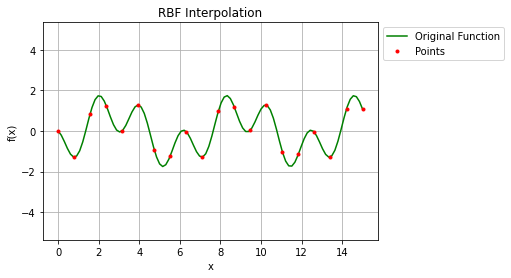

In [2]:
def random_points(func, min_range, max_range, num_samples):
    result = []
    x = np.linspace(min_range, max_range, num_samples, endpoint=True)

    for i in range(0,num_samples):
        result.append((x[i], func(x[i])))

    return result

def draw_points(points, func, min_range, max_range):
    # prepare figure
    fig, ax = plt.subplots()
    ax.grid()
    ax.axis('equal')
    # draw reference function
    t = np.linspace(min_range, max_range, num = 100, endpoint=True)
    plt.plot(t, func(t), linestyle='solid', color="green", label="Original Function")
    # draw points
    x, y = zip(*points)
    plt.plot(x, y, '.', color='red', label="Points")
    # display
    plt.title('RBF Interpolation')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(bbox_to_anchor=(1, 1), loc=2)
    plt.show()

func = lambda x : np.sin(x) * np.cos((x+1)*2) * 2
points = random_points(func, 0, 15, 20)
draw_points(points, func, 0, 15)

## Linear System

In [3]:
'''
 we should solve the system below
 Aw = b where

 b are the sampled points [y0, y1, y2]

 A is the interpolation matrix :
  | k(x0-x0) k(x0-x1) k(x0-x2) ... |
  | k(x1-x0) k(x1-x1) k(x1-x2) ... |
  | k(x2-x0) k(x2-x1) k(x2-x2) ... |
  |   ...      ...      ...    ... |

 w are the weights [w0, w1, w2] - unknown
'''
def compute_RBF_weights(points, kernel):
    num_points = np.size(points,0)
    interpolation_matrix = np.zeros(shape=(num_points,num_points))
    for i in range(num_points):
        for j in range(num_points):
            interpolation_matrix[i,j] = kernel(points[j][0]-points[i][0])

    new_points = np.zeros(shape=(num_points, 1))
    for i in range(num_points):
        new_points[i]  = points[i][1]

    inv_interpolation_matrix = np.linalg.inv(interpolation_matrix)
    weights = np.matmul(inv_interpolation_matrix, new_points)

    return weights

rbf_weights = compute_RBF_weights(points, gaussian_kernel)

## Result

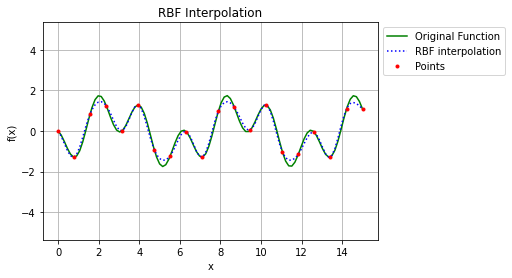

In [4]:
def eval_RBF(points, rbf_weights, kernel, x):
    num_points = np.size(points,0)
    result = 0.0
    for i in range(num_points):
        result += kernel(x - points[i][0]) * rbf_weights[i]

    return result

def draw_points(points, rbf_weights, kernel, func, min_range, max_range):
    # prepare figure
    fig, ax = plt.subplots()
    ax.grid()
    ax.axis('equal')
    # draw reference function
    t = np.linspace(min_range, max_range, num = 100, endpoint=True)
    plt.plot(t, func(t), linestyle='solid', color="green", label="Original Function")
    # draw rbf
    t = np.linspace(min_range, max_range, num = 100, endpoint=True)
    plt.plot(t, eval_RBF(points, rbf_weights, kernel, t), linestyle='dotted', color="blue", label="RBF interpolation")
    # draw points
    x, y = zip(*points)
    plt.plot(x, y, '.', color='red', label="Points")
    # display
    plt.title('RBF Interpolation')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(bbox_to_anchor=(1, 1), loc=2)
    plt.show()

draw_points(points, rbf_weights, gaussian_kernel, func, 0, 15)

## Further Reading

- Powell, Michael JD. "Radial basis functions for multivariable interpolation: a review." Algorithms for approximation (1987).
- Powell, Michael JD. "The theory of radial basis function approximation in 1990." Advances in numerical analysis (1992): 105-210.